In [171]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    fig = pyplot.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')

In [ ]:
#Tiene que decrecer un 0.01 en la J para saber que esta bienlos datos

# INICIO DE DATOS

In [172]:
#DATASET = "diabetes_data."
DATASET = "BD_Covid."
Separacion = ","
Tipo = "csv"
Nombre_del_DATASET = DATASET+Tipo
Nombre_documento = Nombre_del_DATASET

In [173]:
#Se anotaran las columnas que se usaran y el orden
#Columnas = ["Age", "Sex", "HighChol", "CholCheck", "BMI", "Smoker", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Stroke", "HighBP", "Diabetes"]
#Columnas = ["gravity", "ph", "osmo", "cond", "urea", "calc", "target"]
Columnas = ["SEX", "PATIENT_TYPE", "INTUBED", "PNEUMONIA", "AGE", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "ICU", "CLASIFFICATION_FINAL"]

#Columnas =["USMER", "MEDICAL_UNIT", "SEX", "PATIENT_TYPE", "DATE_DIED" , "INTUBED", "PNEUMONIA", "AGE", "PREGNANT", "DIABETES", "COPD", "ASTTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "ICU", "CLASIFFICATION_FINAL"]
#Se anotara las columnas que no se normalizaran porque ya son numeros y no letras
#Excepcion = ["Age", "Sex", "HighChol", "CholCheck", "BMI", "Smoker", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Stroke", "HighBP", "Diabetes"]
#Excepcion = ["gravity", "ph", "osmo", "cond", "urea", "calc", "target"]
#Excepcion = ["SEX", "PATIENT_TYPE", "INTUBED", "PNEUMONIA", "AGE", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "ICU", "CLASIFFICATION_FINAL"]
Excepcion = []

# Normalizacion de Datos

In [174]:
def Reemplazar_Datos(Nuevos_datos, Columna_y_datos):
  Auxiliar = []
  for igu in Columna_y_datos: #Se sacaran los NOMBRES DE LAS COLUMNAS
    Auxiliar = Columna_y_datos[igu] # Se sacaran la lista de tal NOMBRE
    diccionario = {}
    contador = 1
    for dato in Auxiliar:
      diccionario[dato[0]] = dato[1] #Se esta llenando el NOMBRE SIN REPETIR (dato[0]) y NUMERO A REEMPLAZAR (dato[1}])
    Nuevos_datos[igu] = Nuevos_datos[igu].map(diccionario) #Se reemplazara los datos a numeros para ESA COLUMNA
  return Nuevos_datos

In [175]:
def Diccionario_filtrar(Nuevos_datos, columnas):
  Columna_y_datos = {}
  print(columnas)
  for col in columnas:
    #Se sacan todos los nombres sin repetir para cambiarlos a numeros
    print("Columna = ",col)
    Datos_de_columnas = Nuevos_datos[col].unique()
    Iguales = []
    contador = 1
    for dato in Datos_de_columnas:
      print("Dato",dato)
      #Se llena la Lista de IGUALES con el nombre sin repetir con el Numero a Reemplazar
      if col == "CLASIFFICATION_FINAL":
        if(dato < 4):
          dato = 1
        if(dato >= 4):
          dato = 0
      else:
        if dato >= 96:
          dato = "NA"
    #Se llena el Diccionario con el NOMBRE DE LA COLUMNA (col) y NOMBRE SIN REPETIR y NUMERO A REEPLAZAR (Iguales)
    Columna_y_datos[col] = Iguales
    print(Columna_y_datos[col])
  print("FIN DE LA FUNCION")
  return(Columna_y_datos)

In [176]:
def Nom_Col(Nuevos_datos, Excepciones):
  Nombre_columnas = Nuevos_datos.columns
  columnas = []
  for k in  Nombre_columnas:
    columnas.append(k)
  if (len(Excepciones) > 0):
    for exc in Excepciones:
      columnas.remove(exc)
  return (columnas)

In [177]:
def Regularizar_Datos(Nombre_DataSet, Columnas, Excepciones, Separador, tipo):
  Ruta = "/content/drive/MyDrive/Inteligencia_Artificial_Sis420/Examen/"+Nombre_DataSet
  #1 = Si tiene nombre de columnas
  if(tipo == "csv"):
    Datos_Originales = pd.read_csv(Ruta)
  elif(tipo == "txt"):
    Datos_Originales = pd.read_table(Ruta, sep = Separador)
    
  Datos = Datos_Originales.loc[:,Columnas]
  Nuevos_datos = Datos.dropna()
  Nombre_Columnas = Nom_Col(Nuevos_datos,Excepciones)
  print("Nombre_Columnas = ",Nombre_Columnas)
  Columna_y_datos = Diccionario_filtrar(Nuevos_datos, Nombre_Columnas)
  print("INICIO")
  print(len(Columna_y_datos))
  print("FIN")
  Nuevos_datos = Reemplazar_Datos(Nuevos_datos, Columna_y_datos)
  return Nuevos_datos

In [178]:
#-----------------------------------------------------------------------------------------------------------------------------------------
Nuevos_datos = {}
Nuevos_datos = Regularizar_Datos(Nombre_del_DATASET, Columnas, Excepcion, Separacion, Tipo)
#-----------------------------------------------------------------------------------------------------------------------------------------

tamaño de NOMBRE COLUMNAS= 18
Nombre_Columnas =  ['SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'CLASIFFICATION_FINAL']
['SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'CLASIFFICATION_FINAL']
Columna =  SEX
Dato 1
Dato 2
[]
Columna =  PATIENT_TYPE
Dato 1
Dato 2
[]
Columna =  INTUBED
Dato 97
Dato 1
Dato 2
Dato 99
[]
Columna =  PNEUMONIA
Dato 1
Dato 2
Dato 99
[]
Columna =  AGE
Dato 65
Dato 72
Dato 55
Dato 53
Dato 68
Dato 40
Dato 64
Dato 37
Dato 25
Dato 38
Dato 24
Dato 30
Dato 48
Dato 23
Dato 80
Dato 61
Dato 54
Dato 59
Dato 45
Dato 26
Dato 32
Dato 49
Dato 39
Dato 27
Dato 57
Dato 20
Dato 56
Dato 47
Dato 50
Dato 46
Dato 43
Dato 28
Dato 33
Dato 16
Dato 62
Dato 58
Dato 36
Dato 44
Dat

In [179]:
Nombre_documento = "Nuevo_"+DATASET+"txt"
Nuevos_datos.to_csv(Nombre_documento, index=0, header = 0)

In [180]:
Nuevos_datos

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,CLASIFFICATION_FINAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Inicio de Datos

In [ ]:
data = np.loadtxt(Nombre_documento,  delimiter=Separacion)
Tamaño_de_columnas = len(Columnas)-1
X = data[:, :Tamaño_de_columnas]
y = data[:, Tamaño_de_columnas]
m, n = X.shape
#Pronostico, el 1 se deja
#X_array = [1, 1650, 3]
#X_array = [1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0]
#X_array = [1,7.0,1.0,1.0,1.0,45.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,5.0,1.0,0.0,1.0]
X_array = [1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,2,3]

# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00001
#num_iters = 15000
num_iters = 500
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(Tamaño_de_columnas+1)

# Regresion lineal simple

In [ ]:
def computeCost(X, y, theta):
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # numero de ejemplos de entrenamiento #Podria decirses que saca el tamaño de Y(que es 97 datos)
    theta = theta.copy()
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------
data = np.loadtxt("ex1data1.txt",  delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  # m = numero de ejemplos de entrenamiento
#[[1,4.5145], [1,5.1544] ... ] Coloca 1 en la columna 0
X = np.stack([np.ones(m), X], axis=1)

# inicializa los parametros de ajuste
theta = np.zeros(2)
# configuraciones para el descenso por el gradiente
iterations = 15000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
#print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
#-----------------------------------------------------------------------------------------------------------------------------------------

Theta encontrada por descenso gradiente: -3.8958, 1.1930
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


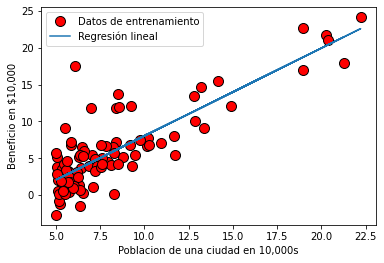

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal']);

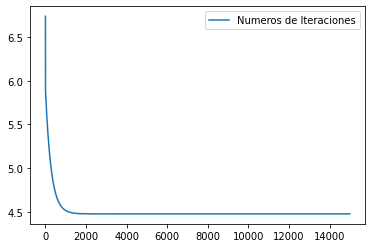

In [ ]:
pyplot.plot(range(0,iterations), J_history)
pyplot.legend(['Numeros de Iteraciones', 'Historial de J']);

In [ ]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 90,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 2798.37

Para una población de = 90,000, se predice un beneficio de 68415.22



# Regresion lineal Multible

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] # numero de ejemplos de entrenamiento
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

[[  1.0708  23.     154.25   ...  32.      27.4     17.1   ]
 [  1.0853  22.     173.25   ...  30.5     28.9     18.2   ]
 [  1.0414  22.     154.     ...  28.8     25.2     16.6   ]
 ...
 [  1.0328  72.     186.75   ...  31.3     27.2     18.    ]
 [  1.0399  72.     190.75   ...  30.5     29.4     19.8   ]
 [  1.0271  74.     207.5    ...  33.7     30.      20.9   ]]
------------------------------------------
[[ 1.          0.80164696 -1.74007329 ... -0.09067593 -0.62671828
  -1.2125412 ]
 [ 1.          1.56506057 -1.81958344 ... -0.58814329  0.11707924
  -0.0319426 ]
 [ 1.         -0.74623993 -1.81958344 ... -1.15193963 -1.71762131
  -1.74917692]
 ...
 [ 1.         -1.19902317  2.15592399 ... -0.32282736 -0.72589128
  -0.24659689]
 [ 1.         -0.82521375  2.15592399 ... -0.58814329  0.36501175
   1.68529172]
 [ 1.         -1.49912369  2.31494429 ...  0.47312041  0.66253075
   2.86589032]]
FIN 
theta calculado por el descenso por el gradiente: [ 1.91507878e+01 -7.45352808e+00  1.53

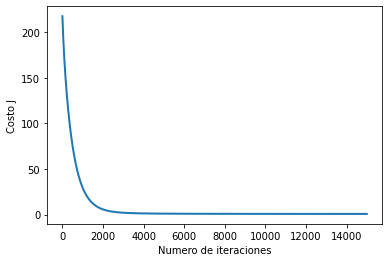

In [ ]:
#data = np.loadtxt("ex1data2.txt",  delimiter=',')
#X = data[:, :2]
#y = data[:, 2]
#m = y.size
X_norm, mu, sigma = featureNormalize(X)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# Elegir algun valor para alpha (probar varias alternativas)
#alpha = 0.01
#num_iters = 15000
# inicializa theta y ejecuta el descenso por el gradiente
#theta = np.zeros(3)
#--------------------------------------------------------------------------------------------------------------------------------------------
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
#X_array = [1, 1650, 3]
X_array[1:Tamaño_de_columnas+1] = (X_array[1:Tamaño_de_columnas+1] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto
print("Prediccion = ",price)
print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

## Ecuacion de la normal

In [ ]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    #print("---",theta)
    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);
# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
#X_array = [1, 1650, 3]
#print("-----------------------")
price = np.dot(X_array, theta) 
print("Prediccion = ",price)
print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.91507937e+01 -7.81090196e+00  1.58306875e-01  2.94896448e-01
 -2.91742388e-02 -6.90362566e-02  2.25322559e-01  1.99788974e-01
  1.37033912e-01 -8.78058641e-02 -1.11661528e-02 -1.44923482e-01
 -1.65993268e-01  6.82916394e-02  6.84350408e-03]
Prediccion =  11.693180204740012
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $12


# Regresion Logistica

In [ ]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [ ]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    return J, grad

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
def calcularCosto(theta, X, y):
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0] # numero de ejemplos de entrenamiento
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente:
[-0.00022183 -0.00021875 -0.00150647 -0.00214874 -0.00246744  0.00470607
  0.00327722]
La probabilidad de que la persona tenga DIABETES es de: (usando el descenso por el gradiente):0.5273357707238263


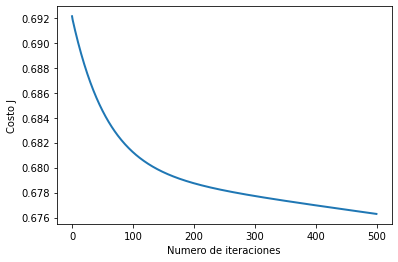

In [ ]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:')
print(theta)
# verificar si tiene diabetes o no
aprueba = sigmoid(np.dot(X_array, theta))
print(f"La probabilidad de que la persona tenga DIABETES es de: (usando el descenso por el gradiente):{aprueba}")

In [ ]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
cost, grad = costFunction(initial_theta, X, y)

In [ ]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot(X_array, theta))
print("La probabilidad de que la persona tenga DIABETES es:", prob*100, " %")
# Compute accuracy on our training set
p = predict(theta, X)
print("Precisión de entrenamiento fue de: ", np.mean(p == y) * 100, " %")
#70%

La probabilidad de que la persona tenga DIABETES es: 52.73357707238263  %
Precisión de entrenamiento fue de:  53.16455696202531  %


## Usando `scipy.optimize`

In [ ]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': num_iters}
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun
theta = res.x

# Imprimir theta en la pantalla
print("Costo con un valor de theta encontrado por optimize.minimize fue de:", cost)

print('Theta obtenidos:')
print(theta)

Costo con un valor de theta encontrado por optimize.minimize fue de: 0.3810092768390917
Theta obtenidos:
[-5.45483267e+02  5.44479144e+02 -3.14072895e-01 -5.04916087e-03
 -1.38430061e-01 -1.45208362e-02  7.13634253e-01]


In [ ]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot(X_array, theta))
print("Probabilidad = ", prob)
print("La probabilidad de que la persona tenga DIABETES es:", prob*100," %")
p = predict(theta, X)
print("Precisión de entrenamiento fue de:", np.mean(p == y) * 100, " %")

Probabilidad =  0.41905043004928944
La probabilidad de que la persona tenga DIABETES es: 41.90504300492894  %
Precisión de entrenamiento fue de: 83.54430379746836  %
